In [1]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
img = Image.open('/root/autodl-tmp/video_sequence/train/000000_000000_depth_718.8560180664062.png')
np.array(img).shape

(376, 1241)

In [3]:
img = transforms.Resize((128,416))(img)
depth_map=np.array(img)

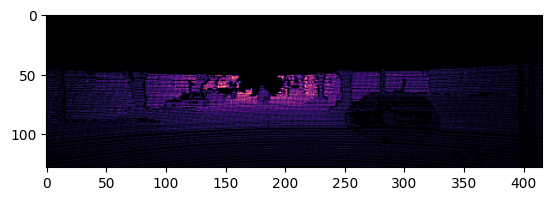

In [4]:
plt.figure("Depth")
plt.imshow(depth_map, cmap='magma')
#plt.colorbar()
plt.show()

In [5]:
print(np.array(img))

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [117  38  56 ...  42  66  36]
 [  0   0   1 ...   1   2   0]
 [173 102 125 ... 114 171  87]]


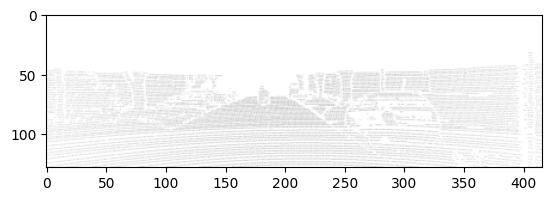

In [6]:
img2 = Image.open('/root/autodl-tmp/video_sequence/train/000000_000000_gtFine_class.png')

img2 = transforms.Resize((128,416))(img2)
plt.figure("class")
plt.imshow(img2)
plt.show()

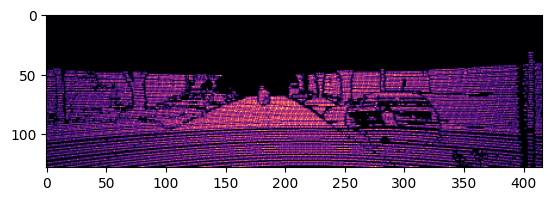

In [7]:
mat=255-np.array(img2)
plt.imshow(mat, cmap='magma')
plt.show()

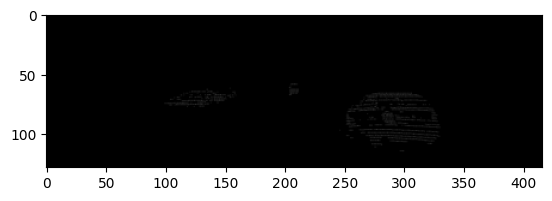

In [8]:
img3 = Image.open('/root/autodl-tmp/video_sequence/train/000000_000000_gtFine_instance.png')
img3 = transforms.Resize((128,416))(img3)
plt.figure("class")
plt.imshow(img3)
plt.show()

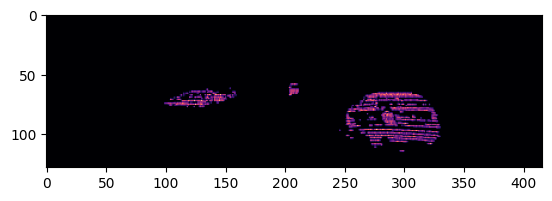

In [9]:
instance=np.array(img3)
plt.figure("class")
plt.imshow(instance, cmap='magma')
plt.show()

In [10]:
print(instance)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


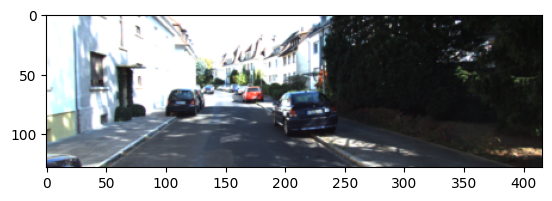

In [11]:
img4 = Image.open('/root/autodl-tmp/video_sequence/train/000000_000213_leftImg8bit.png')
img4 = transforms.Resize((128,416))(img4)
plt.figure("class")
plt.imshow(img4)
plt.show()

In [12]:
img6 = Image.open('/root/autodl-tmp/video_sequence/train/000000_000308_gtFine_instance.png')
img6=np.array(img6)
unique_vals = np.unique(img6)
print(unique_vals)

[  0 125 126 127 128 129 130 131]


In [13]:
img7 = Image.open('/root/autodl-tmp/video_sequence/train/000000_000201_gtFine_class.png')
img7=np.array(img7)
unique_vals = np.unique(img7)
print(unique_vals)

[  0   8  10  12  13  14  15  16  17 255]


In [14]:
from posenet import posenet
import torch

In [15]:
pose_net=posenet.PoseExpNet(nb_ref_imgs=1, output_exp=False)

In [16]:
pose_net.eval()

PoseExpNet(
  (conv1): Sequential(
    (0): Conv2d(6, 16, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): ReLU(inplace=True)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (conv4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (conv5): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (conv6): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (conv7): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (pose_pred): Conv2d(256, 6, kernel_size=(1, 1), stride=(1, 1))
)

In [17]:
to_tensor = transforms.ToTensor()
target=to_tensor(img4.convert("RGB")).unsqueeze(0)
source=to_tensor(img2.convert("RGB")).unsqueeze(0)

In [18]:
exp_mask, pose = pose_net(target, [source])

In [19]:
pose

tensor([[[-0.0004, -0.0005, -0.0006,  0.0006, -0.0003,  0.0004]]],
       grad_fn=<MulBackward0>)

In [20]:
exp_mask

In [21]:

img = Image.open('/root/autodl-tmp/coco/panoptic_val2017/000000001532.png')
ins=np.array(img)
unique_vals_ins = np.unique(ins)
print(unique_vals_ins)

[  0  59  61  64  65  66  67  68  71  72  74  75  78  80  81  95 101 105
 106 117 120 121 122 123 124 125 128 139 148 158 160 165 197 230]


In [22]:
img = Image.open('/root/autodl-tmp/coco/stuff_val2017_pixelmaps/000000001532.png')
map=np.array(img)
unique_vals_map = np.unique(map)
print(unique_vals_map)

[  0  96 149 157 169 183]


In [23]:
id=ins[:,:,0]*256*256+ins[:,:,1]*256+ins[:,:,2]

In [24]:
unique_vals_id = np.unique(id)
print(unique_vals_id)

[    0 16704 16964 18248 19280 20049 26986 30841 30859 32123 32896 40596
 50662]


In [25]:
instance

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

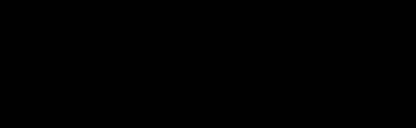

In [26]:
img2

In [27]:
mat

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [16,  5,  7, ...,  7, 11,  6],
       [ 0,  0,  0, ...,  0,  0,  0],
       [24, 14, 17, ..., 20, 31, 16]], dtype=int32)

In [28]:
gt_ins = Image.open('/root/autodl-tmp/video_sequence/train/000000_000300_gtFine_instance.png')
#resize_transform = transforms.Resize((192, 640), interpolation=transforms.InterpolationMode.NEAREST)
# 对图像进行 resize
#gt_ins = np.array(resize_transform(gt_ins))
gt_ins = np.array(gt_ins)

In [29]:
gt_cls = Image.open('/root/autodl-tmp/video_sequence/train/000000_000300_gtFine_class.png')
# 对图像进行 resize
#gt_cls = np.array(resize_transform(gt_cls))
gt_cls = np.array(gt_cls)

In [30]:
gt_dep = Image.open('/root/autodl-tmp/video_sequence/train/000000_000300_depth_718.8560180664062.png')
# 对图像进行 resize
#gt_cls = np.array(resize_transform(gt_cls))
gt_dep = np.array(gt_dep)

In [31]:
gt_pop=gt_cls*10000+gt_ins

In [32]:
gt_pop

array([[2550000, 2550000, 2550000, ..., 2550000, 2550000, 2550000],
       [2550000, 2550000, 2550000, ..., 2550000, 2550000, 2550000],
       [2550000, 2550000, 2550000, ..., 2550000, 2550000, 2550000],
       ...,
       [ 100000, 2550000, 2550000, ..., 2550000, 2550000, 2550000],
       [2550000, 2550000, 2550000, ..., 2550000, 2550000, 2550000],
       [2550000, 2550000, 2550000, ..., 2550000, 2550000, 2550000]],
      dtype=int32)

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def get_color_map(num_colors):
    """
    生成一个包含 num_colors 个随机颜色的映射表。
    """
    np.random.seed(256)  # 固定种子，保证每次生成相同的颜色
    return np.random.randint(0, 256, (num_colors, 3), dtype=np.uint8)

def colorize_panoptic(panoptic_map, colormap):
    """
    根据 panoptic_map 中每个像素的 panoptic_id，从 colormap 中取对应颜色，
    生成彩色图像。
    """
    h, w = panoptic_map.shape
    color_image = np.zeros((h, w, 3), dtype=np.uint8)
    unique_ids = np.unique(panoptic_map)
    for uid in unique_ids:
        # 如果 uid 为 0 或 2550000，设定为黑色
        if uid == 2550000:
            color = np.array([0, 0, 0], dtype=np.uint8)
        else:
            # 使用 modulo 确保 uid 超过颜色数量时仍然可以映射
            color = colormap[uid % len(colormap)]
        color_image[panoptic_map == uid] = color
    return color_image



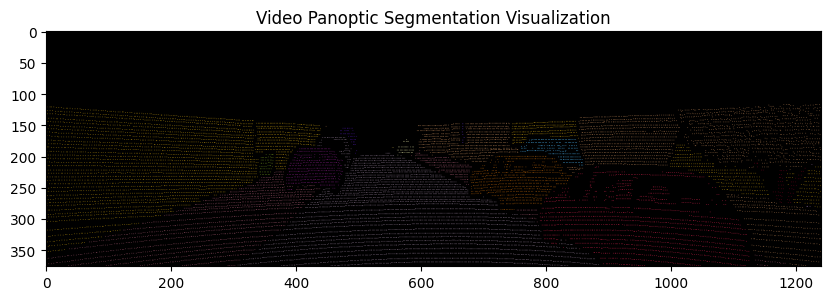

In [34]:
# 假设 panoptic_map 是已经生成的全景分割标注，尺寸为 (H, W)
# 例如：panoptic_map = np.load("path_to_panoptic_map.npy")

# 定义颜色映射表，假设最多256种不同颜色
num_colors = 256
colormap = get_color_map(num_colors)

# 生成彩色图像
color_image = colorize_panoptic(gt_pop, colormap)
# 展示结果
plt.figure(figsize=(10, 8))
plt.imshow(color_image, cmap='hsv')
plt.title("Video Panoptic Segmentation Visualization")
plt.show()

In [35]:
print(color_image.shape)

(376, 1241, 3)


In [36]:
unique_vals_map = np.unique(color_image)
print(unique_vals_map)

[  0   9  16  22  28  30  34  36  49  66  75  77  83  89  96 110 112 117
 122 124 128 129 134 137 139 140 146 153 155 160 164 168 179 181 183 184
 194 205 214 215 243 245]


In [37]:
import torch
import torch.nn as nn
img_tensor = torch.tensor(color_image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

# 3. 定义最大池化层，kernel_size=2, stride=2（对每个通道独立操作）
max_pool = nn.MaxPool2d(kernel_size=2, stride=1)

pooled_tensor = max_pool(max_pool(max_pool(img_tensor)))
# 池化后形状为 (1, 3, 88, 620) —— 每个通道下采样了一半

# 4. 转换回 NumPy 数组，并将通道维度移到最后，得到形状 (88, 620, 3)
pooled_image = pooled_tensor.squeeze(0).permute(1, 2, 0).numpy().astype(np.int32)

print("原始图像尺寸:", pooled_image.shape)
print("下采样后图像尺寸:", pooled_tensor.shape)


原始图像尺寸: (373, 1238, 3)
下采样后图像尺寸: torch.Size([1, 3, 373, 1238])


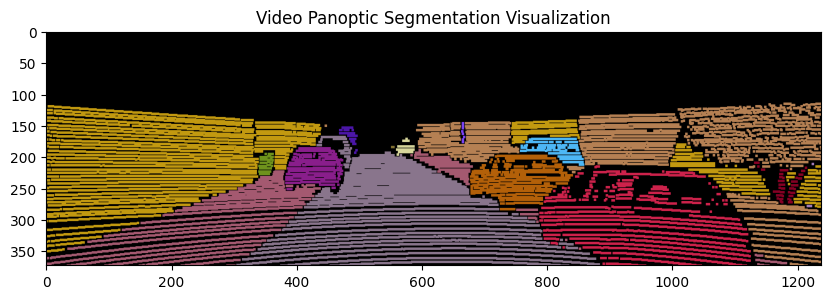

In [38]:
plt.figure(figsize=(10, 8))
plt.imshow(pooled_image)
plt.title("Video Panoptic Segmentation Visualization")
plt.show()

In [39]:
gt_ins = Image.open('/root/autodl-tmp/video_sequence/train/000000_000010_gtFine_instance.png')
#resize_transform = transforms.Resize((192, 640), interpolation=transforms.InterpolationMode.NEAREST)
# 对图像进行 resize
#gt_ins = np.array(resize_transform(gt_ins))
gt_ins = np.array(gt_ins)
gt_cls = Image.open('/root/autodl-tmp/video_sequence/train/000000_000010_gtFine_class.png')
# 对图像进行 resize
#gt_cls = np.array(resize_transform(gt_cls))
gt_cls = np.array(gt_cls)
gt_dep = Image.open('/root/autodl-tmp/video_sequence/train/000000_000010_depth_718.8560180664062.png')
# 对图像进行 resize
#gt_cls = np.array(resize_transform(gt_cls))
gt_dep = np.array(gt_dep)
gt_pop=gt_cls+gt_ins
num_colors = 256
colormap = get_color_map(num_colors)
color_image = colorize_panoptic(gt_pop, colormap)

In [40]:
img_tensor = torch.tensor(color_image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

# 3. 定义最大池化层，kernel_size=2, stride=2（对每个通道独立操作）
max_pool = nn.MaxPool2d(kernel_size=2, stride=1)

pooled_tensor = max_pool(max_pool(max_pool(img_tensor)))
# 池化后形状为 (1, 3, 88, 620) —— 每个通道下采样了一半

# 4. 转换回 NumPy 数组，并将通道维度移到最后，得到形状 (88, 620, 3)
pooled_image = pooled_tensor.squeeze(0).permute(1, 2, 0).numpy().astype(np.int32)

print("原始图像尺寸:", pooled_image.shape)
print("下采样后图像尺寸:", pooled_tensor.shape)


原始图像尺寸: (373, 1238, 3)
下采样后图像尺寸: torch.Size([1, 3, 373, 1238])


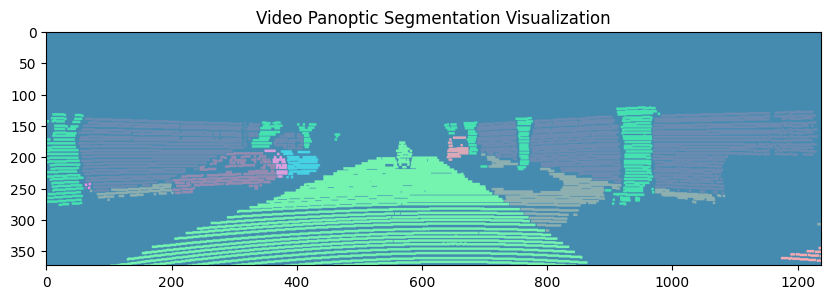

In [41]:
plt.figure(figsize=(10, 8))
plt.imshow(pooled_image)
plt.title("Video Panoptic Segmentation Visualization")
plt.show()